In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
# Separate scaler for the target variable
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:
df.set_index('Unnamed: 0', inplace=True)

In [5]:
df

,Open_NVDA,EMA10_,Lag_Close_1,MA50_,MA10_,Lag_Close_3,Close_NVDA
Unnamed: 0,,,,,,,
0,0.043750,0.041016,0.041016,0.042602,0.040664,0.041016,0.041016
1,0.044271,0.041797,0.041016,0.042602,0.040664,0.041016,0.045313
2,0.044271,0.041797,0.045313,0.042602,0.040664,0.041016,0.045313
3,0.044271,0.041797,0.045313,0.042602,0.040664,0.041016,0.045313
4,0.045833,0.041797,0.045313,0.042602,0.040664,0.045313,0.041797
...,...,...,...,...,...,...,...
9478,140.009995,138.192065,138.309998,139.799999,137.676997,134.289993,144.470001
9479,148.589996,140.235324,144.470001,139.997399,139.551997,138.309998,149.429993
9480,148.589996,140.235324,149.429993,139.997399,139.551997,138.309998,149.429993


In [6]:
# Create lagged features for Close_diff_NVDA

lags_to_add = [1, 2, 3]  # Specify the lags to include

for lag in lags_to_add:
    df[f'Lag_Close_diff_{lag}'] = df['Close_NVDA'].shift(lag)

In [7]:
df = df.bfill()

In [8]:
df['Close_NVDA'] = target_scaler.fit_transform(df[['Close_NVDA']])  # Target variable
df[df.columns.difference(['Close_NVDA'])] = feature_scaler.fit_transform(df[df.columns.difference(['Close_NVDA'])])

In [9]:
df

,Open_NVDA,EMA10_,Lag_Close_1,MA50_,MA10_,Lag_Close_3,Close_NVDA,Lag_Close_diff_1,Lag_Close_diff_2,Lag_Close_diff_3
Unnamed: 0,,,,,,,,,,
0,0.000058,0.000037,0.000046,0.000042,0.000037,0.000046,0.000046,0.000046,0.000046,0.000046
1,0.000061,0.000043,0.000046,0.000042,0.000037,0.000046,0.000075,0.000046,0.000046,0.000046
2,0.000061,0.000043,0.000075,0.000042,0.000037,0.000046,0.000075,0.000075,0.000046,0.000046
3,0.000061,0.000043,0.000075,0.000042,0.000037,0.000046,0.000075,0.000075,0.000075,0.000046
4,0.000071,0.000043,0.000075,0.000042,0.000037,0.000075,0.000051,0.000075,0.000075,0.000075
...,...,...,...,...,...,...,...,...,...,...
9478,0.914899,0.954130,0.925567,0.998590,0.944195,0.898659,0.966800,0.925567,0.925567,0.898659
9479,0.970979,0.968241,0.966800,1.000000,0.957058,0.925567,1.000000,0.966800,0.925567,0.925567
9480,0.970979,0.968241,1.000000,1.000000,0.957058,0.925567,1.000000,1.000000,0.966800,0.925567


In [10]:
import numpy as np

In [11]:
# Ensure the target column is defined
target_column = 'Close_NVDA'
sequence_length = 10

# Get the index of the target column
target_index = df.columns.get_loc(target_column)

In [12]:
# Prepare sequences
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df.iloc[i:i + sequence_length].values)  # Input sequence
    y.append(df.iloc[i + sequence_length, target_index])  # Target value

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [13]:
X.shape, y.shape

((9473, 10, 10), (9473,))

In [14]:
# Convert the DataFrame to a NumPy array, excluding the index
data_values = df.values

In [15]:
# Initialize as Python lists
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

# Split data manually into train, validation, and test sets
train_size = int(len(data_values) * 0.7)
val_size = int(len(data_values) * 0.85)

for i in range(len(data_values) - sequence_length):
    if i + sequence_length <= train_size:
        # Add to training data
        X_train.append(data_values[i:i + sequence_length])  # Input sequence
        y_train.append(data_values[i + sequence_length, target_index])  # Target value
    elif i + sequence_length <= val_size:
        # Add to validation data
        X_val.append(data_values[i:i + sequence_length])
        y_val.append(data_values[i + sequence_length, target_index])
    else:
        # Add to test data
        X_test.append(data_values[i:i + sequence_length])
        y_test.append(data_values[i + sequence_length, target_index])

# Convert to NumPy arrays after appending
X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)


In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6629, 10, 10), (6629,), (1422, 10, 10), (1422,), (1422, 10, 10), (1422,))

In [17]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Single output
])

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the GRU model
batch_size = 32
epochs = 50

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2004e-05 - mae: 0.0020 - val_loss: 3.3686e-06 - val_mae: 0.0013
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8281e-08 - mae: 1.2905e-04 - val_loss: 3.2758e-06 - val_mae: 0.0012
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7626e-08 - mae: 1.1782e-04 - val_loss: 3.0908e-06 - val_mae: 0.0012
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6111e-08 - mae: 1.2914e-04 - val_loss: 2.9048e-06 - val_mae: 0.0012
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6137e-08 - mae: 1.5593e-04 - val_loss: 2.9138e-06 - val_mae: 0.0012
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7235e-08 - mae: 1.4307e-04 - val_loss: 5.7726e-06 - val_mae: 0.0018
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6330e-08 - mae: 1.5438e-04 - val_loss: 4.0906e-06 - val_mae: 0.0015
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1421e-08 - mae: 1.4386e-04 - val

In [23]:
import matplotlib.pyplot as plt

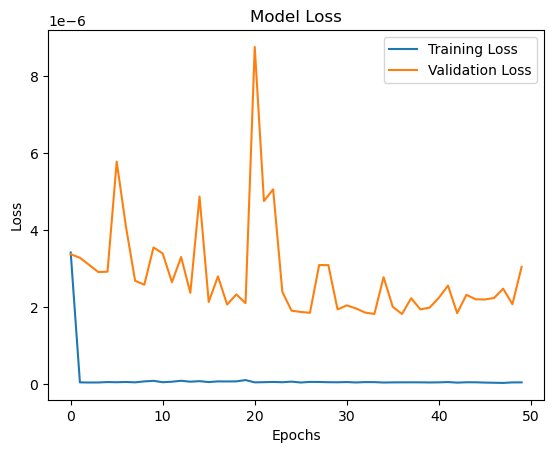

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {mse}")
print(f"Unscaled Test MAE: {mae}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Unscaled Test MSE: 23.420841281061303
Unscaled Test MAE: 2.540928181381333


In [27]:
# Function to create a GRU model with given hyperparameters
def create_gru_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)  # Single output
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [28]:
# Example: Define a model with specific hyperparameters
model = create_gru_model(units_layer1=128, units_layer2=64, dropout_rate=0.3, learning_rate=0.001)
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import itertools
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameter space
param_grid = {
    'units_layer1': [64, 128],
    'units_layer2': [32, 64],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0005]
}

In [30]:
# Generate all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

In [31]:
# Store results
results = []

In [32]:
# Perform grid search
for params in param_combinations:
    units_layer1, units_layer2, dropout_rate, learning_rate = params

    print(f"Training with params: {params}")
    
    # Create model with current hyperparameters
    model = create_gru_model(
        units_layer1=units_layer1,
        units_layer2=units_layer2,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0,  # Suppress detailed output
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Predict on validation set
    val_predictions = model.predict(X_val, verbose=0)
    
    # Unscale y_val and predictions
    y_val_unscaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
    val_predictions_unscaled = target_scaler.inverse_transform(val_predictions.reshape(-1, 1))
    
    # Calculate MSE and MAE on unscaled validation set
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    val_mse_unscaled = mean_squared_error(y_val_unscaled, val_predictions_unscaled)
    val_mae_unscaled = mean_absolute_error(y_val_unscaled, val_predictions_unscaled)

    # Append results
    results.append((params, val_mse_unscaled, val_mae_unscaled))

Training with params: (64, 32, 0.2, 0.001)
Training with params: (64, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Find the best hyperparameters
best_params = sorted(results, key=lambda x: x[1])[0]

In [34]:
# Display the best hyperparameters and their validation loss
print("Best Parameters:", best_params[0])
print("Validation Loss:", best_params[1])
print("Validation MAE:", best_params[2])

Best Parameters: (128, 64, 0.2, 0.001)
Validation Loss: 0.04197699311534036
Validation MAE: 0.1340459910458486


In [35]:
import numpy as np
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [36]:
# Retrain the model with the best hyperparameters
best_model = create_gru_model(
    units_layer1=best_params[0][0], 
    units_layer2=best_params[0][1], 
    dropout_rate=best_params[0][2], 
    learning_rate=best_params[0][3]
)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
best_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                         │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model on the full training set
history_best = best_model.fit(
    X_final_train, y_final_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1966e-05 - mae: 0.0034
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0195e-06 - mae: 5.3197e-04
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5966e-07 - mae: 5.0845e-04
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0252e-06 - mae: 6.3294e-04
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3934e-07 - mae: 5.0188e-04
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0099e-06 - mae: 6.5098e-04
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4849e-07 - mae: 6.8320e-04
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9552e-07 - mae: 5.6091e-04
Epoch 9/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6590e-07 - mae: 5.3481e-04
Epoch 10/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5428e-07 - mae: 4.8952e-04
Epoch 11/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9810e-07 - mae: 5.4769e-04
Epoch 12/50
252/252 ━━━

In [39]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(best_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {mse}")
print(f"Unscaled Test MAE: {mae}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Unscaled Test MSE: 7.163336310217686
Unscaled Test MAE: 1.52513702609871


In [40]:
# Previous Closing Price as reference
# Use the last value of y_test as predictions (lag-1 prediction)
previous_closing_predictions = X_test[:, -1, 0]

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
# Unscale y_test and naive predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
previous_predictions_unscaled = target_scaler.inverse_transform(X_test[:, -1, 0].reshape(-1, 1))  # Assuming X_test[:, -1, 0] represents the previous day's price

# Calculate MSE and MAE for the naive model
previous_mse = mean_squared_error(y_test_unscaled, previous_predictions_unscaled)
previous_mae = mean_absolute_error(y_test_unscaled, previous_predictions_unscaled)

print(f"Previous Model Unscaled MSE: {previous_mse}")
print(f"Previous Model Unscaled MAE: {previous_mae}")

Previous Model Unscaled MSE: 7.258816783994902
Previous Model Unscaled MAE: 1.6894076182348186


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# Reshape the data for linear regression (flatten time steps and features)
X_train_flat = X_final_train.reshape(X_final_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_final_train)

LinearRegression()

In [46]:
# Predict on the test set
lr_predictions = lr_model.predict(X_test_flat)

In [47]:
# Unscale y_test and linear regression predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
lr_predictions_unscaled = target_scaler.inverse_transform(lr_predictions.reshape(-1, 1))

# Calculate MSE and MAE for the linear regression model
lr_mse = mean_squared_error(y_test_unscaled, lr_predictions_unscaled)
lr_mae = mean_absolute_error(y_test_unscaled, lr_predictions_unscaled)

print(f"Linear Regression Unscaled MSE: {lr_mse}")
print(f"Linear Regression Unscaled MAE: {lr_mae}")

Linear Regression Unscaled MSE: 2.7360259648727694
Linear Regression Unscaled MAE: 0.885215420696452


In [48]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_data = df['Close_NVDA']

In [49]:
sarima_data

Unnamed: 0
0       0.000046
1       0.000075
2       0.000075
3       0.000075
4       0.000051
          ...   
9478    0.966800
9479    1.000000
9480    1.000000
9481    1.000000
9482    0.937816
Name: Close_NVDA, Length: 9483, dtype: float64

In [50]:
# Split into train and test sets
train_sarima = sarima_data[:len(X_final_train)]
test_sarima = sarima_data[len(X_final_train):]

In [51]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_sarima, 
                       order=(1, 0, 1),  # ARIMA parameters (p, d, q)
                       seasonal_order=(1, 1, 0, 5),  # Seasonal order (P, D, Q, s)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()

In [52]:
# Make predictions on the test set
sarima_predictions = sarima_results.predict(start=len(train_sarima), end=len(train_sarima) + len(test_sarima) - 1)

In [53]:
# Unscale y_test and SARIMA predictions
test_sarima_unscaled = target_scaler.inverse_transform(
    test_sarima.to_numpy().reshape(-1, 1)
)
sarima_predictions_unscaled = target_scaler.inverse_transform(
    sarima_predictions.to_numpy().reshape(-1, 1)
)

# Calculate MSE and MAE for the SARIMA model
sarima_mse = mean_squared_error(test_sarima_unscaled, sarima_predictions_unscaled)
sarima_mae = mean_absolute_error(test_sarima_unscaled, sarima_predictions_unscaled)

print(f"SARIMA Unscaled MSE: {sarima_mse}")
print(f"SARIMA Unscaled MAE: {sarima_mae}")


SARIMA Unscaled MSE: 2727.249561720192
SARIMA Unscaled MAE: 33.425774124864915


In [54]:
from tensorflow.keras.layers import LSTM

In [55]:
def create_lstm_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)  # Single output
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [56]:
lstm_model = create_lstm_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001)
lstm_model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_19 (GRU)                         │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3150e-05 - mae: 0.0021 - val_loss: 4.7961e-06 - val_mae: 0.0016
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7385e-08 - mae: 1.2225e-04 - val_loss: 4.4486e-06 - val_mae: 0.0015
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7732e-08 - mae: 1.2912e-04 - val_loss: 3.6296e-06 - val_mae: 0.0013
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9137e-08 - mae: 1.3076e-04 - val_loss: 3.7400e-06 - val_mae: 0.0013
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1746e-08 - mae: 1.3322e-04 - val_loss: 3.1123e-06 - val_mae: 0.0012
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4776e-08 - mae: 1.5205e-04 - val_loss: 4.2543e-06 - val_mae: 0.0015
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6557e-08 - mae: 1.5072e-04 - val_loss: 2.8332e-06 - val_mae: 0.0011
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8099e-08 - mae: 1.5460e-04 - val

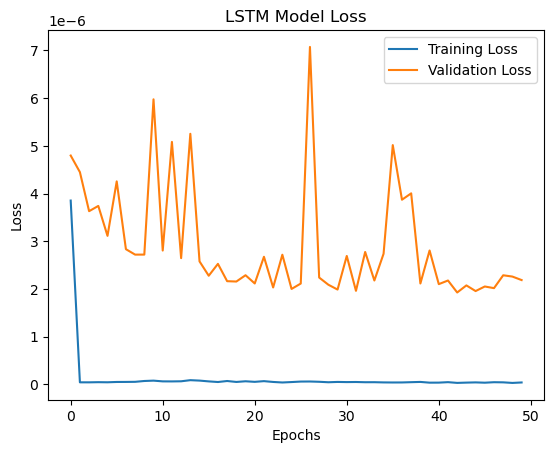

In [58]:
# Plot the training and validation loss for the LSTM model
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
# Unscale y_test and GRU/LSTM predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_unscaled = target_scaler.inverse_transform(lstm_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE for the GRU/LSTM model
lstm_mse = mean_squared_error(y_test_unscaled, lstm_predictions_unscaled)
lstm_mae = mean_absolute_error(y_test_unscaled, lstm_predictions_unscaled)

print(f"LSTM Unscaled MSE: {lstm_mse}")
print(f"LSTM Unscaled MAE: {lstm_mae}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Unscaled MSE: 16.462978550799534
LSTM Unscaled MAE: 2.2838998283515


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameter combinations for the grid search
lstm_param_combinations = [
    (units_layer1, units_layer2, dropout_rate, learning_rate)
    for units_layer1 in [64, 128]
    for units_layer2 in [32, 64]
    for dropout_rate in [0.2, 0.3]
    for learning_rate in [0.001, 0.0005]
]

lstm_results = []

# Perform grid search
for params in lstm_param_combinations:
    units_layer1, units_layer2, dropout_rate, learning_rate = params

    print(f"Training LSTM with params: {params}")

    # Create model with current hyperparameters
    lstm_model = create_lstm_model(
        units_layer1=units_layer1,
        units_layer2=units_layer2,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate
    )

    # Train the model
    history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0,  # Suppress detailed output
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

    # Predict on validation set
    val_predictions = lstm_model.predict(X_val, verbose=0)

    # Unscale y_val and predictions
    y_val_unscaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
    val_predictions_unscaled = target_scaler.inverse_transform(val_predictions.reshape(-1, 1))

    # Calculate MSE and MAE on unscaled validation set
    val_mse_unscaled = mean_squared_error(y_val_unscaled, val_predictions_unscaled)
    val_mae_unscaled = mean_absolute_error(y_val_unscaled, val_predictions_unscaled)

    # Append results
    lstm_results.append((params, val_mse_unscaled, val_mae_unscaled))

# Find the best hyperparameters
best_lstm_params = sorted(lstm_results, key=lambda x: x[1])[0]  # Sort by MSE

# Display the best hyperparameters and their validation loss
print("Best LSTM Parameters:", best_lstm_params[0])
print("Validation MSE (Unscaled):", best_lstm_params[1])
print("Validation MAE (Unscaled):", best_lstm_params[2])


Training LSTM with params: (64, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best LSTM Parameters: (64, 32, 0.2, 0.0005)
Validation MSE (Unscaled): 0.04154337716190132
Validation MAE (Unscaled): 0.13014895805326698


In [61]:
# Find the best hyperparameters
best_lstm_params = sorted(lstm_results, key=lambda x: x[1])[0]

In [62]:
# Display the best hyperparameters and their validation loss
print("Best Parameters:", best_lstm_params[0])
print("Validation Loss:", best_lstm_params[1])
print("Validation MAE:", best_lstm_params[2])

Best Parameters: (64, 32, 0.2, 0.0005)
Validation Loss: 0.04154337716190132
Validation MAE: 0.13014895805326698


In [63]:
import numpy as np
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [64]:
# Retrain the model with the best hyperparameters
best_lstm_model = create_lstm_model(
    units_layer1=best_lstm_params[0][0], 
    units_layer2=best_lstm_params[0][1], 
    dropout_rate=best_lstm_params[0][2], 
    learning_rate=best_lstm_params[0][3]
)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
best_lstm_model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_36 (GRU)                         │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model on the full training set
history_lstm_best = best_lstm_model.fit(
    X_final_train, y_final_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5855e-05 - mae: 0.0022
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5741e-07 - mae: 4.9135e-04
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3032e-07 - mae: 5.2975e-04
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3727e-07 - mae: 6.1726e-04
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8186e-07 - mae: 5.1085e-04
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3975e-07 - mae: 5.7929e-04
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4153e-07 - mae: 5.3410e-04
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1683e-07 - mae: 5.2644e-04
Epoch 9/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7597e-07 - mae: 5.6858e-04
Epoch 10/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3525e-07 - mae: 5.4859e-04
Epoch 11/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3472e-07 - mae: 5.5501e-04
Epoch 12/50
252/252 ━━━

In [67]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(best_lstm_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
lstm_mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
lstm_mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {lstm_mse}")
print(f"Unscaled Test MAE: {lstm_mae}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Unscaled Test MSE: 3.107142797877689
Unscaled Test MAE: 0.9813457199289829


In [68]:
n_rows_to_display = 50

In [69]:
gru_train_predictions = best_model.predict(X_train)
gru_test_predictions = best_model.predict(X_test)

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


In [70]:
lstm_train_predictions = best_lstm_model.predict(X_train)
lstm_test_predictions = best_lstm_model.predict(X_test)

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


In [71]:
# Previous closing price predictions for training and testing data
previous_train_predictions = X_train[:, -1, 0]
previous_test_predictions = X_test[:, -1, 0]

In [72]:
# Linear Regression predictions for training and testing data
lr_train_predictions = lr_model.predict(X_train.reshape(X_train.shape[0], -1))
lr_test_predictions = lr_model.predict(X_test_flat)

In [73]:
# Unscale the actual values and predictions
y_train_unscaled = target_scaler.inverse_transform(y_train.reshape(-1, 1))[-n_rows_to_display:]
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))[-n_rows_to_display:]

gru_train_predictions_unscaled = target_scaler.inverse_transform(gru_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
gru_test_predictions_unscaled = target_scaler.inverse_transform(gru_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

lstm_train_predictions_unscaled = target_scaler.inverse_transform(lstm_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
lstm_test_predictions_unscaled = target_scaler.inverse_transform(lstm_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

previous_train_predictions_unscaled = target_scaler.inverse_transform(previous_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
previous_test_predictions_unscaled = target_scaler.inverse_transform(previous_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

lr_train_predictions_unscaled = target_scaler.inverse_transform(lr_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
lr_test_predictions_unscaled = target_scaler.inverse_transform(lr_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

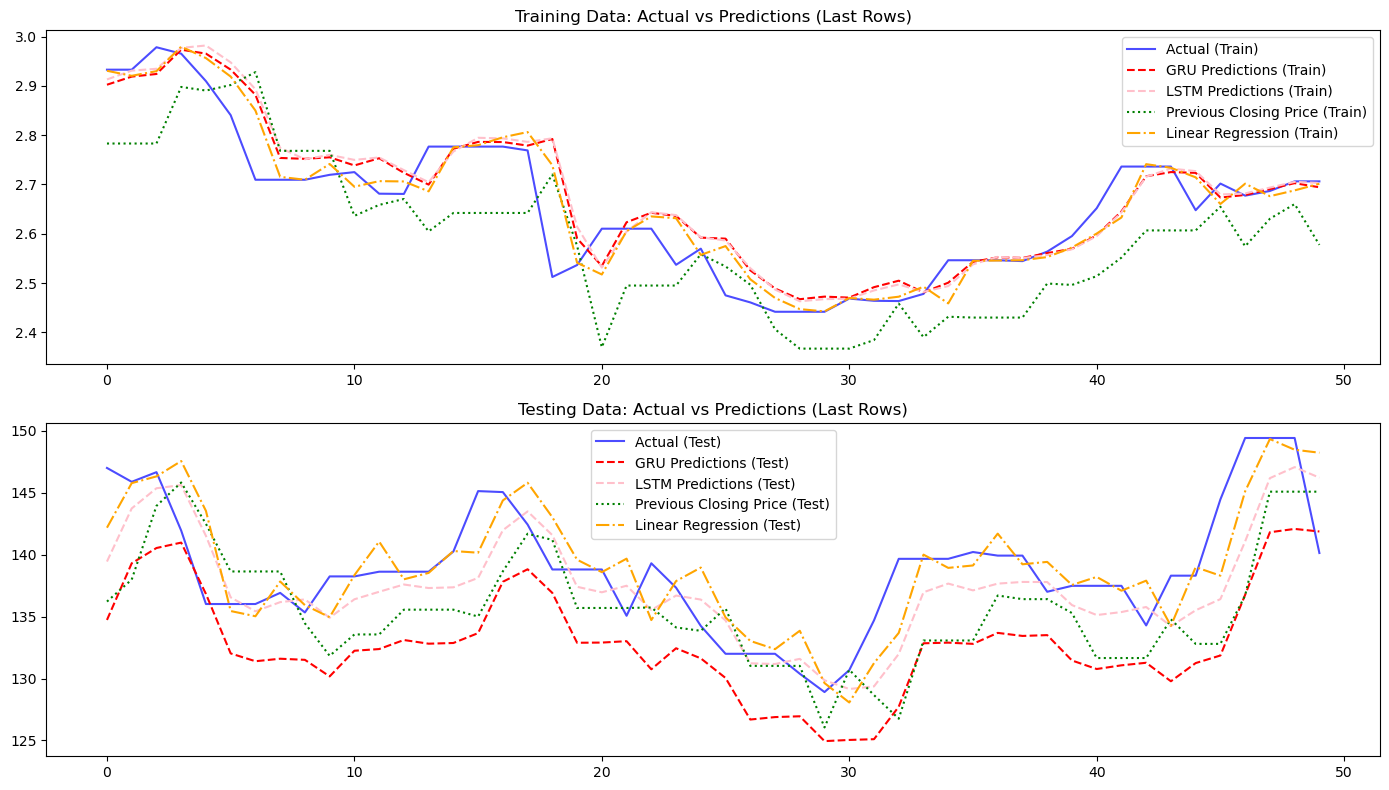

In [74]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot actual vs. predicted for training data
plt.subplot(2, 1, 1)
plt.plot(y_train_unscaled, label='Actual (Train)', color='blue', linestyle='-', alpha=0.7)
plt.plot(gru_train_predictions_unscaled, label='GRU Predictions (Train)', color='red', linestyle='--')
plt.plot(lstm_train_predictions_unscaled, label='LSTM Predictions (Train)', color='pink', linestyle='--')
plt.plot(previous_train_predictions_unscaled, label='Previous Closing Price (Train)', color='green', linestyle=':')
plt.plot(lr_train_predictions_unscaled, label='Linear Regression (Train)', color='orange', linestyle='-.')
plt.title('Training Data: Actual vs Predictions (Last Rows)')
plt.legend()

# Plot actual vs. predicted for testing data
plt.subplot(2, 1, 2)
plt.plot(y_test_unscaled, label='Actual (Test)', color='blue', linestyle='-', alpha=0.7)
plt.plot(gru_test_predictions_unscaled, label='GRU Predictions (Test)', color='red', linestyle='--')
plt.plot(lstm_test_predictions_unscaled, label='LSTM Predictions (Test)', color='pink', linestyle='--')
plt.plot(previous_test_predictions_unscaled, label='Previous Closing Price (Test)', color='green', linestyle=':')
plt.plot(lr_test_predictions_unscaled, label='Linear Regression (Test)', color='orange', linestyle='-.')
plt.title('Testing Data: Actual vs Predictions (Last Rows)')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
# Data for MSE and MAE
models = ['GRU', 'Previous', 'Linear Regression', 'SARIMA']
mse_values = [mse, previous_mse, lr_mse, sarima_mse]
mae_values = [mae, previous_mae, lr_mae, sarima_mae]

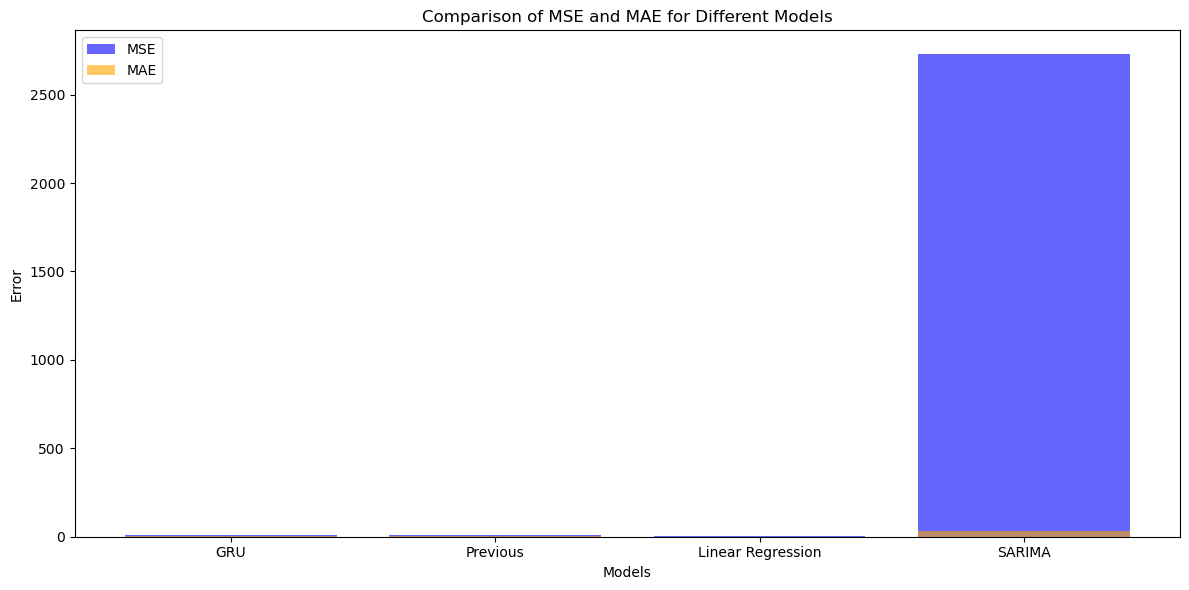

In [76]:
# Plotting MSE
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='blue', alpha=0.6, label='MSE')
plt.bar(models, mae_values, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
# Data for MSE and MAE (without SARIMA)
models = ['GRU', 'Previous', 'Linear Regression']
mse_values = [mse, previous_mse, lr_mse]
mae_values = [mae, previous_mae, lr_mae]

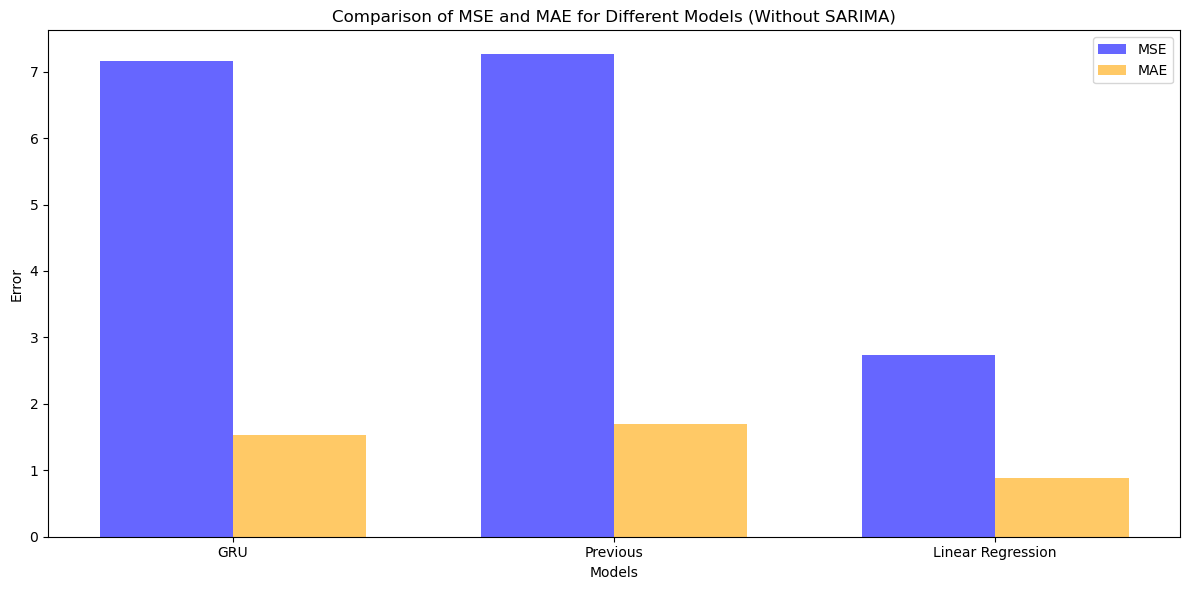

In [78]:
# Plotting MSE and MAE
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.bar([i + bar_width for i in index], mae_values, bar_width, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models (Without SARIMA)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [80]:
gru_predictions = best_model.predict(X_test)
lr_predictions = lr_model.predict(X_test_flat)
previous_predictions = X_test[:, -1, 0]  # Using previous closing price as prediction

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [81]:
meta_model_input = np.column_stack((gru_predictions, lr_predictions, previous_predictions))

In [82]:
meta_model = LinearRegression()
meta_model.fit(meta_model_input, y_test)

LinearRegression()

In [83]:
meta_model_predictions = meta_model.predict(meta_model_input)

In [84]:
# Unscale y_test and meta-model predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
meta_model_predictions_unscaled = target_scaler.inverse_transform(meta_model_predictions.reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
meta_mse = mean_squared_error(y_test_unscaled, meta_model_predictions_unscaled)
meta_mae = mean_absolute_error(y_test_unscaled, meta_model_predictions_unscaled)

print(f"Meta-Model (Stacking) MSE: {meta_mse}")
print(f"Meta-Model (Stacking) MAE: {meta_mae}")

Meta-Model (Stacking) MSE: 2.6577227826947523
Meta-Model (Stacking) MAE: 0.8784927605064584


In [85]:
models = ['GRU', 'Previous', 'Linear Regression', 'Meta-Model (Stacking)']
mse_values = [mse, previous_mse, lr_mse, meta_mse]
mae_values = [mae, previous_mae, lr_mae, meta_mae]

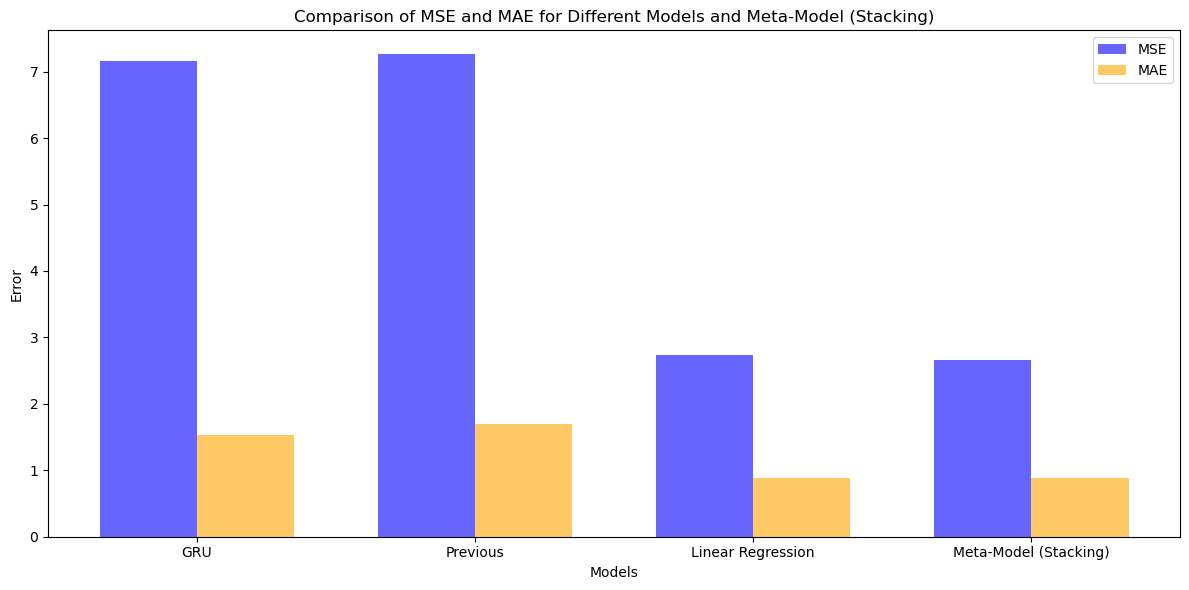

In [86]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.bar([i + bar_width for i in index], mae_values, bar_width, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
models = ['GRU', 'Previous', 'Linear Regression', 'Meta-Model (Stacking)']
mse_values = [mse, previous_mse, lr_mse, meta_mse]

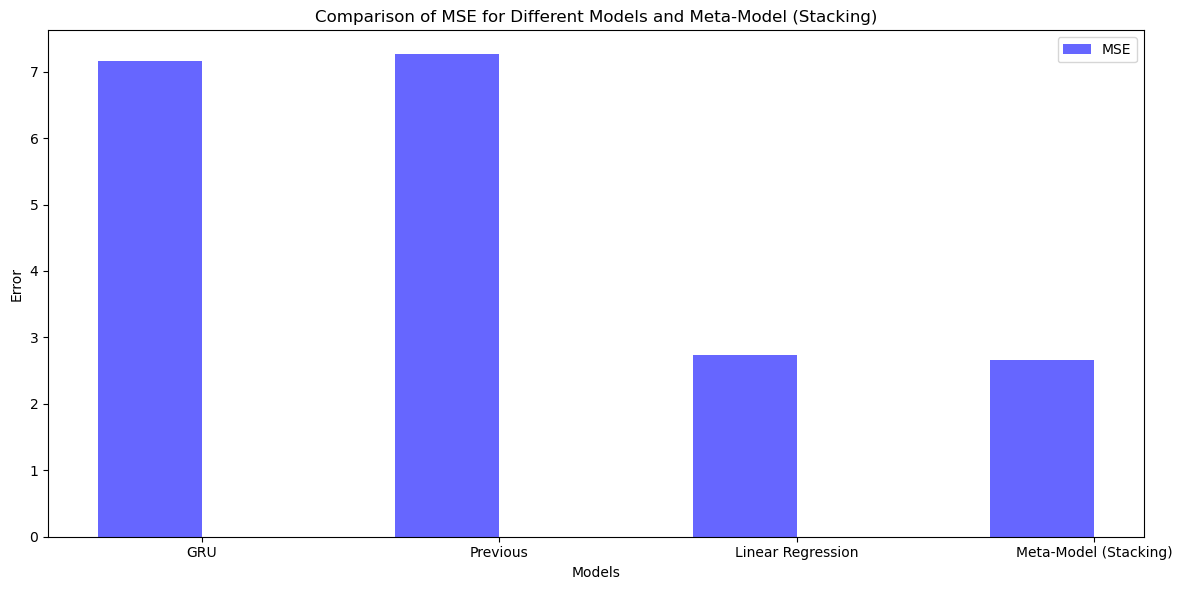

In [88]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
models = ['Linear Regression', 'Meta-Model (Stacking)']
mse_values = [lr_mse, meta_mse]

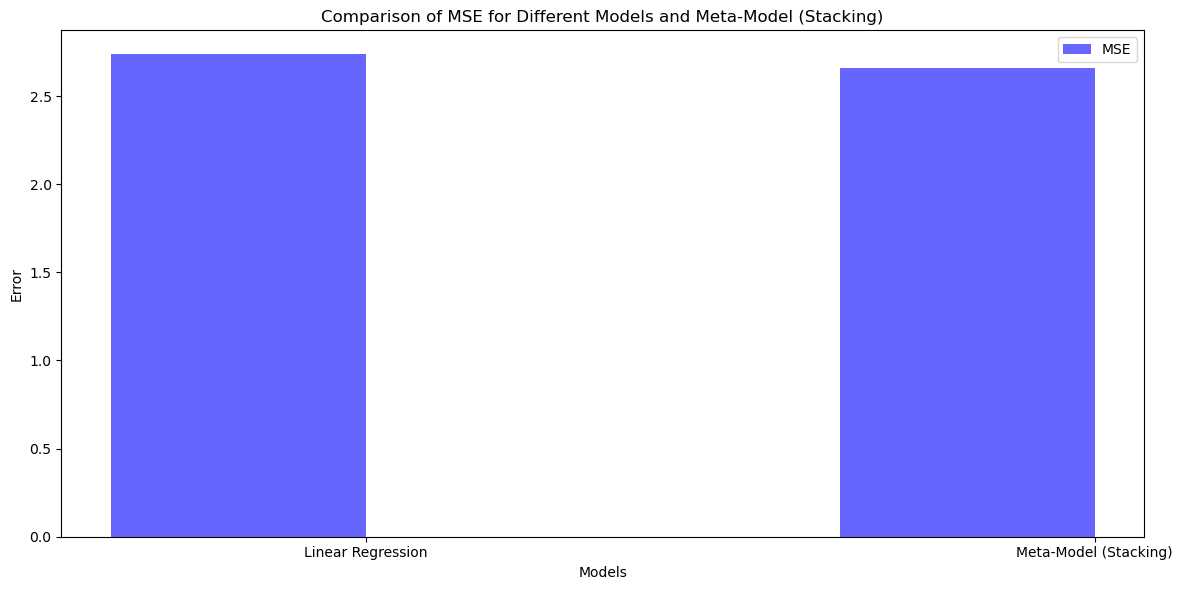

In [90]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
meta_test_predictions_unscaled = target_scaler.inverse_transform(meta_model_predictions.reshape(-1, 1))[-n_rows_to_display:]

In [92]:
# Unscale the actual values and predictions
y_train_unscaled = target_scaler.inverse_transform(y_train.reshape(-1, 1))[-n_rows_to_display:]
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))[-n_rows_to_display:]

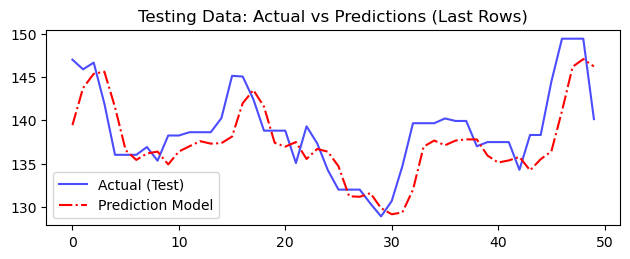

In [192]:
# Plot actual vs. predicted for testing data
plt.subplot(2, 1, 2)
plt.plot(y_test_unscaled, label='Actual (Test)', color='blue', linestyle='-', alpha=0.7)
plt.plot(lstm_test_predictions_unscaled, label='Prediction Model', color='red', linestyle='-.')
plt.title('Testing Data: Actual vs Predictions (Last Rows)')
plt.legend()

plt.tight_layout()
plt.show()

In [214]:
history_lstm_best = best_lstm_model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4846e-04 - mae: 0.0111
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0987e-05 - mae: 0.0045
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9320e-05 - mae: 0.0039
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9100e-05 - mae: 0.0047
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4748e-05 - mae: 0.0036
Epoch 6/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4803e-05 - mae: 0.0029
Epoch 7/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0347e-05 - mae: 0.0046
Epoch 8/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9157e-05 - mae: 0.0029
Epoch 9/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1207e-05 - mae: 0.0031
Epoch 10/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8722e-05 - mae: 0.0034
Epoch 11/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5906e-05 - mae: 0.0031
Epoch 12/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

In [229]:
# Extract the last sequence, including the target column
sequence_length = 10
last_sequence = df.iloc[-sequence_length:].copy()

In [216]:
# Scale the target column
last_sequence['Close_NVDA'] = target_scaler.transform(last_sequence[['Close_NVDA']])

# Scale the other features
features = df.columns.difference(['Close_NVDA'])  # All features except the target
last_sequence[features] = feature_scaler.transform(last_sequence[features])

In [231]:
# Convert to a 3D array for GRU input
last_sequence_scaled = last_sequence.values.reshape(1, sequence_length, len(df.columns))

In [233]:
# Predict the scaled closing value for the next day
predicted_scaled_value = best_lstm_model.predict(last_sequence_scaled)

# Inverse transform to get the actual closing value
predicted_close = target_scaler.inverse_transform(predicted_scaled_value.reshape(-1, 1))

print(f"Predicted Close for the next day: {predicted_close}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Close for the next day: [[139.33595]]
